In [104]:
import pandas as pd
import alpaca_trade_api as tradeapi

In [2]:
alpaca = tradeapi.REST()

In [77]:
df = alpaca.get_barset(["SHOP"],timeframe="1D", limit=300).df

In [78]:
df.head()

SHOP                                 
                              open    high     low   close   volume
time                                                               
2019-08-05 00:00:00-04:00  313.870  327.50  313.39  321.32  2283234
2019-08-06 00:00:00-04:00  327.410  333.38  324.40  332.61  1703750
2019-08-07 00:00:00-04:00  330.080  342.83  328.53  341.31  1692783
2019-08-08 00:00:00-04:00  344.010  358.58  342.34  357.60  1826738
2019-08-09 00:00:00-04:00  361.144  371.63  360.86  369.86  2198272

In [79]:
shop = df.xs("close",axis="columns",level=1)["SHOP"]

In [80]:
returns = shop.pct_change()

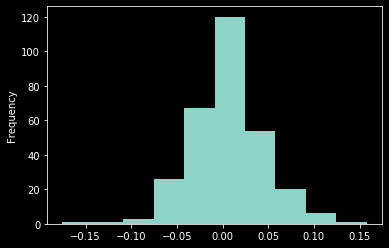

In [81]:
returns.plot(kind="hist")

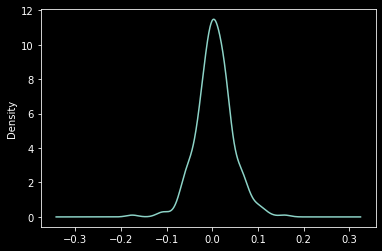

In [82]:
returns.plot(kind="density")

In [83]:
std = returns.std()
mu = returns.mean()

In [84]:
from random import gauss

In [85]:
gauss(mu,std)

0.03493671998688503

In [86]:
lastval = shop.iloc[-1]

In [87]:
# synthetic return for next day
lastval * (1+gauss(mu,std))

1016.7724484603501

In [88]:
simvals = [shop.iloc[-1]]
simvals

[1096.02]

In [89]:
days = 15

for day in range(days):
    newval = simvals[-1] * (1+gauss(mu,std))
    simvals.append(newval)

In [90]:
def simulate_stock(days, starting_val):
    simvals = [starting_val]
    
    for day in range(days):
        newval = simvals[-1] * (1+gauss(mu,std))
        simvals.append(newval)
    
    return simvals

In [91]:
simulate_stock(15, shop.iloc[-1])

[1096.02,
 1095.9149809576747,
 1084.9055182867908,
 1029.0043364179862,
 976.9313365425434,
 1047.1771358359822,
 1067.0569180108935,
 1120.0876974428488,
 1116.5441039862721,
 1167.938773617227,
 1124.2060064830566,
 1130.481457789555,
 1111.31101494193,
 1129.3187995044627,
 1052.338735704044,
 1093.774131067678]

In [95]:
trials = 1000
results = []
for trial in range(trials):
    results.append(simulate_stock(15, shop.iloc[-1]))

In [96]:
result_df = pd.DataFrame(results).T
result_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1096.020000,1096.020000,1096.020000,1096.020000,1096.020000,1096.020000,1096.020000,1096.020000,1096.020000,1096.020000,...,1096.020000,1096.020000,1096.020000,1096.020000,1096.020000,1096.020000,1096.020000,1096.020000,1096.020000,1096.020000
1,1181.924416,1041.978557,1082.857405,1127.202950,1098.636498,1169.441178,1051.524934,1074.766443,1092.999742,1123.588038,...,1169.561570,1061.902107,1055.334361,995.106852,1111.177382,1131.732538,1023.015894,1155.016310,1098.862897,1059.555102
2,1226.676495,1021.086206,1078.081354,1152.881615,1137.454808,1141.805214,1048.963185,1078.281367,1142.653531,1078.808115,...,1141.330458,1016.130128,1034.148875,1003.304491,1163.654786,1165.504693,944.967602,1209.104282,1143.972787,1076.397327
3,1201.562217,1005.853974,1095.095138,1153.770131,1231.758716,1207.402628,1075.386526,1031.939173,1185.546813,1126.983504,...,1144.735623,982.803419,1046.442953,986.045414,1184.714748,1153.534014,954.745749,1176.853054,1149.346129,1098.549910
4,1280.316652,1031.720344,1168.949248,1197.005576,1190.251978,1221.951342,1104.316570,982.163420,1228.719717,1139.736300,...,1115.305086,985.680346,1051.349533,958.357396,1143.910194,1184.018694,975.205082,1195.322197,1128.385604,1088.697562


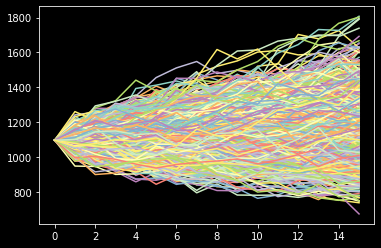

In [97]:
result_df.plot(legend=False)

In [98]:
end_values = result_df.iloc[-1]

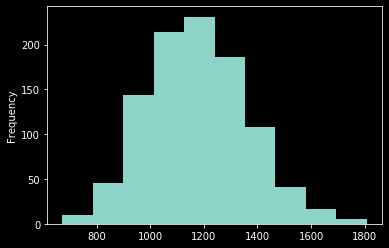

In [99]:
end_values.plot(kind="hist")


In [100]:
end_values.quantile([0.100, 0.900])

0.1     949.494831
0.9    1421.178428
Name: 15, dtype: float64

In [101]:
lastval

1096.02

In [103]:
(1421.18-1096.02)/1096.02

0.29667341836827804